Intern Name: Nihar Sapaliga

Task 1: Prediction Using Supervised ML

Data Source:http://bit.ly/w-data

Problem Statemet: To Predict the percentage of an student based on the no. of study hours.

# Importing Libraries

In [1]:
import numpy as np #For working with Arrays
import pandas as pd #For working with reading data from csv file
import matplotlib.pyplot as plt #for graphs

In [2]:
#Reading data from remote link
url='http://bit.ly/w-data'
dataset=pd.read_csv(url)
print("Dataset imported successfully")
dataset.head()

Dataset imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
dataset.tail(10)

,Hours,Scores
15,8.9,95
16,2.5,30
17,1.9,24
18,6.1,67
19,7.4,69
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


# Plotting of Data to Check the Data Distribution

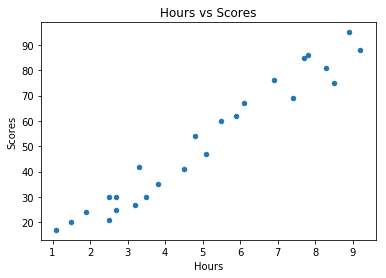

In [4]:
dataset.plot(x="Hours",y="Scores",style="o",kind="scatter")
plt.title('Hours vs Scores')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

# Assigning the Data to Variables

In [5]:
x=dataset.iloc[:,:-1].values #iloc is used for selection of particular rows or coloumn from the table
y=dataset.iloc[:,-1].values

In [6]:
x

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [7]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

# Model Building

In [8]:
from sklearn.model_selection import train_test_split

In [10]:
x_train, x_test, y_train, y_test= train_test_split(x, y,test_size=1/3,random_state=10)

In [11]:
x_train

array([[3.8],
       [8.5],
       [6.9],
       [9.2],
       [6.1],
       [7.7],
       [4.8],
       [7.8],
       [8.3],
       [2.7],
       [2.5],
       [1.9],
       [2.5],
       [8.9],
       [3.5],
       [2.7]])

In [12]:
y_train

array([35, 75, 76, 88, 67, 85, 54, 86, 81, 30, 30, 24, 21, 95, 30, 25],
      dtype=int64)

In [13]:
x_test

array([[1.5],
       [5.1],
       [3.3],
       [3.2],
       [4.5],
       [7.4],
       [1.1],
       [5.5],
       [5.9]])

In [14]:
y_test

array([20, 47, 42, 27, 41, 69, 17, 60, 62], dtype=int64)

In [16]:
#Linear Regression
from sklearn.linear_model import LinearRegression
LR=LinearRegression()

In [17]:
#Training the model to use fit function
LR.fit(x_train,y_train)
print("Training Complete")

Training Complete


In [19]:
#Plotting the Regression Line
line=LR.coef_*x+LR.intercept_

<function matplotlib.pyplot.show(*args, **kw)>

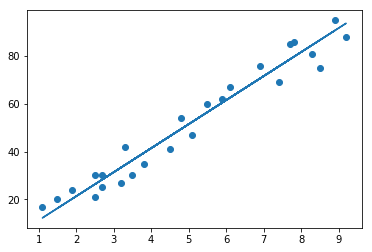

In [20]:
plt.scatter(x,y)
plt.plot(x,line)
plt.show


In [22]:
#Predicting on X_test
y_pred_LR=LR.predict(x_test)

In [23]:
x_test

array([[1.5],
       [5.1],
       [3.3],
       [3.2],
       [4.5],
       [7.4],
       [1.1],
       [5.5],
       [5.9]])

In [24]:
y_test

array([20, 47, 42, 27, 41, 69, 17, 60, 62], dtype=int64)

In [25]:
y_pred_LR

array([16.25022454, 52.47572715, 34.36297584, 33.35671188, 46.43814338,
       75.61979826, 12.22516869, 56.500783  , 60.52583884])

Difference Between the Predicted Data and the Actual Data

In [26]:
diff_LR=y_test-y_pred_LR

In [27]:
res_df=pd.concat([pd.Series(y_pred_LR),pd.Series(y_test),pd.Series(diff_LR)],axis=1)
res_df.columns=['Predicted Score','Actual Score','Difference']

In [28]:
res_df

,Predicted Score,Actual Score,Difference
0,16.250225,20,3.749775
1,52.475727,47,-5.475727
2,34.362976,42,7.637024
3,33.356712,27,-6.356712
4,46.438143,41,-5.438143
5,75.619798,69,-6.619798
6,12.225169,17,4.774831
7,56.500783,60,3.499217
8,60.525839,62,1.474161


# Predicting With own input Data

In [35]:
hours=[[8.27]]
own_pred= LR.predict(hours)
print("Number of Hours = {}".format (hours))
print("Predicted Score = {}".format (own_pred[0]))

Number of Hours = [[8.27]]
Predicted Score = 84.37429472860005


In [36]:
from sklearn import metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,y_pred_LR))

Mean Absolute Error: 5.002821085599796


Task Completed Successfully!!